# 2-wymiarowy rozkład Normalny

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie 
Proszę wygenerować próbkę z rozkładu Normalnego
$$
m = [0,0]
$$

oraz

$$
\Sigma = [[4.40, -2.75], [-2.75,  5.50]]
$$

In [3]:
mean1 = np.array([0, 0])
cov1 = np.array([[4.40, -2.75], [-2.75,  5.50]])
X1_rv=multivariate_normal(mean1, cov1)
X = X1_rv.rvs(1000)

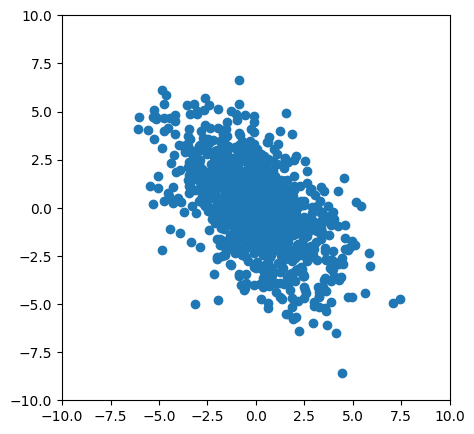

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.show()

# Zadanie 
Proszę policzyć średnią oraz macierz kowariancji próbki.

In [5]:
means = X.mean(axis=0)
cov = np.cov(X.T)

# Zadanie
Proszę zdefiniować zmienną losową o razkładzie zadanym na podstawie empirycznej średniej i kowariancji oraz narysować na jednym wykresie:

- próbkę
- poziomice rozkładu normalnego 

In [6]:
X2_rv=multivariate_normal(means, cov)

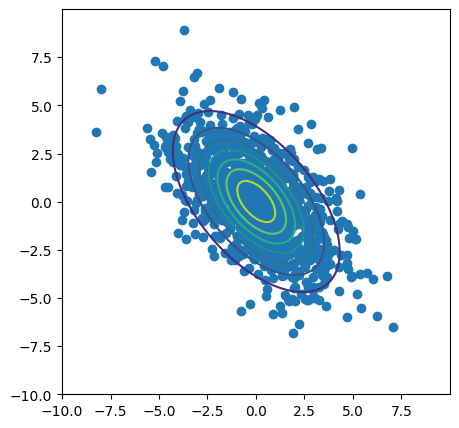

In [7]:
X= X2_rv.rvs(1000) 

fig, ax = plt.subplots(figsize= (5,5))
ax.scatter(X[:,0],X[:,1])

x, y = np.mgrid[-10:10:.01,-10:10:.01]
ax.contour(x,y,X2_rv.pdf(np.dstack((x,y))))
plt.show()



# Zadanie
Policz wektory i wartości własne macierzy kowariancji. Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

[2.16224427 7.73537717]
[[-0.76012247  0.64977984]
 [-0.64977984 -0.76012247]]


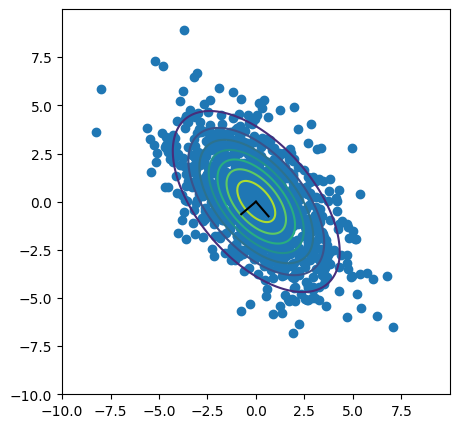

In [8]:


fig, ax = plt.subplots(figsize= (5,5))
ax.scatter(X[:,0],X[:,1])

x, y = np.mgrid[-10:10:.01,-10:10:.01]
ax.contour(x,y,X2_rv.pdf(np.dstack((x,y))))


val =np.linalg.eigvals(cov)
val, vect =np.linalg.eig(cov)

ax.plot([0,vect[0][0]],[0,vect[1][0]],color="black")
ax.plot([0,vect[0][1]],[0,vect[1][1]],color="black")

print(val)
print(vect)
plt.show()



# Zadanie 
Proszę wygenerować próbkę na kwadracie $[0,1] \times [0,1]$.
Następnie proszę policzyć średnią oraz macierz kowariancji próbki.

Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

[0.5046761 0.4895797]
[-0.73810431  0.67468661]
[[ 0.5046761   0.4895797   0.39996893 -0.43756432]
 [ 0.5046761   0.4895797  -0.41602488 -0.38028015]]


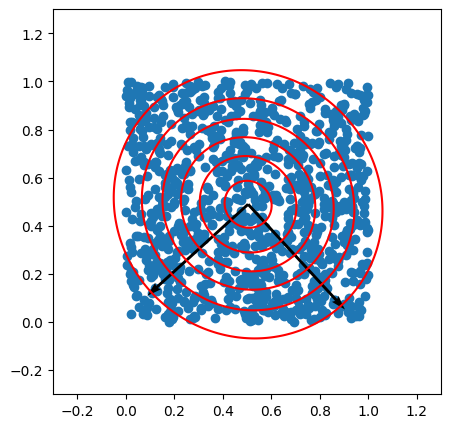

In [12]:
X =np.stack( (stats.uniform(0, 1).rvs(1000),stats.uniform(0, 1).rvs(1000)), 1)
#print(X)
means = X.mean(axis=0)
cov = np.cov(X.T)
X2_rv=multivariate_normal(means, cov)

e_values, e_vectors = np.linalg.eig(cov)
print(means)
print(e_vectors[0,:])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-0.3,1.3])
ax.set_ylim([-0.3,1.3])

#plot eigen vectors
soa =np.array( [ [means[0],means[1],2*np.sqrt(e_values[1])*e_vectors[0,1],2*np.sqrt(e_values[1])*e_vectors[1,1]],
                 [means[0],means[1],2*np.sqrt(e_values[0])*e_vectors[0,0],2*np.sqrt(e_values[0])*e_vectors[1,0]]] )
print(soa)
X1,Y1,U1,V1 = zip(*soa)
ax.quiver(X1,Y1,U1,V1,angles='xy',scale_units='xy',scale=1)

# plot levelsets
x, y = np.mgrid[-1.3:1.3:.01, -1.3:1.3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
ax.contour(x, y, X2_rv.pdf(pos), 6, colors = 'r')
plt.show()